# Homeassignment: Programming For Psychologists


## Title: Brain Areas Associated with Psychosis 

04.12.2024

Links: https://neurosynth.org/analyses/terms/psychosis/

Karla Tann  



### Step 2&3: Localization & Visualization 

***Importing data***

I downloaded following data from Nilearn (link above): anatomical data (structural fMRI) and funcional data (uniformity test) that is shows structural and functional areas associated with psychosis. 

First, to locate my data on my computer I imported glob to my conda environment which allowed me to localize my data based on their file extensions '*.nii' 

I created a loop to name the data based on their file name. 

***Data Visualization***

From the nilearn library i downloaded images and with the image.load_img function i loaded the neuroimaging file into a Python object to be able to work and visualize the files.

The nil.plotting.plot_stat_map function allowed me to visualize the functional MRI results on the structural brain images. I added the colormap, minimum threshold for the colormap and the coordinates for slcing the brain image.

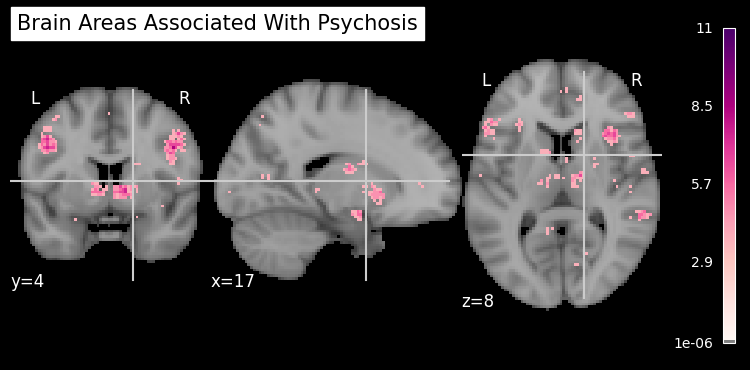

In [5]:

import glob 
import nilearn as nil 
from nilearn import plotting, image 

#access location of MRI data 
data = glob.glob("*.nii")  

#create loop for data file 
for file in data: 
    if "anatomical" in file:
        anatomical_data = file 
    if "uniformity" in file:
        functional_data = file 

#create image from file
functional_image= image.load_img(functional_data)
anatomical_image= image.load_img(anatomical_data) 

#create stacked image 
nil.plotting.plot_stat_map(
    stat_map_img=functional_image, 
    bg_img=anatomical_image, 
    title= ("Brain Areas Associated With Psychosis"), 
    cmap="RdPu",
    vmin=(0.1), 
    cut_coords=(17, 4, 8)) 

plotting.show()


 ### Step 4: Histogram  

I loaded my functional MRI data using the nib.load function, which i defined as my functional_predata. To extract only the positive voxel activation i used the `data[data>0]` function resulting in my functional_hdata which only represents the positive voxel activation. 

I created a figure with a histogram displaying teh functional_hdata and i added title, label and a grid. 

<Figure size 800x500 with 0 Axes>

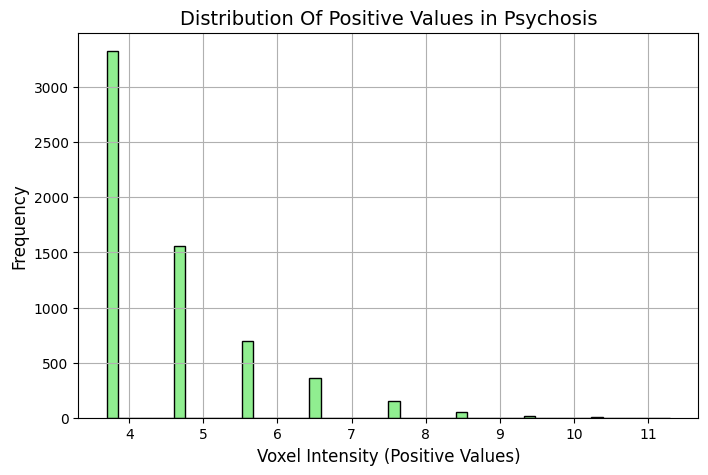

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt  

#Load the functional data 
img = nib.load(functional_data)
functional_predata = img.get_fdata()

#Extract positive values 
functional_hdata = functional_predata[functional_predata > 0]


#Plot histogram & Costumize
plt.figure(figsize=(8, 5))
plt.hist(functional_hdata, bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution Of Positive Values in Psychosis", fontsize=14)
plt.xlabel("Voxel Intensity (Positive Values)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()